In [6]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


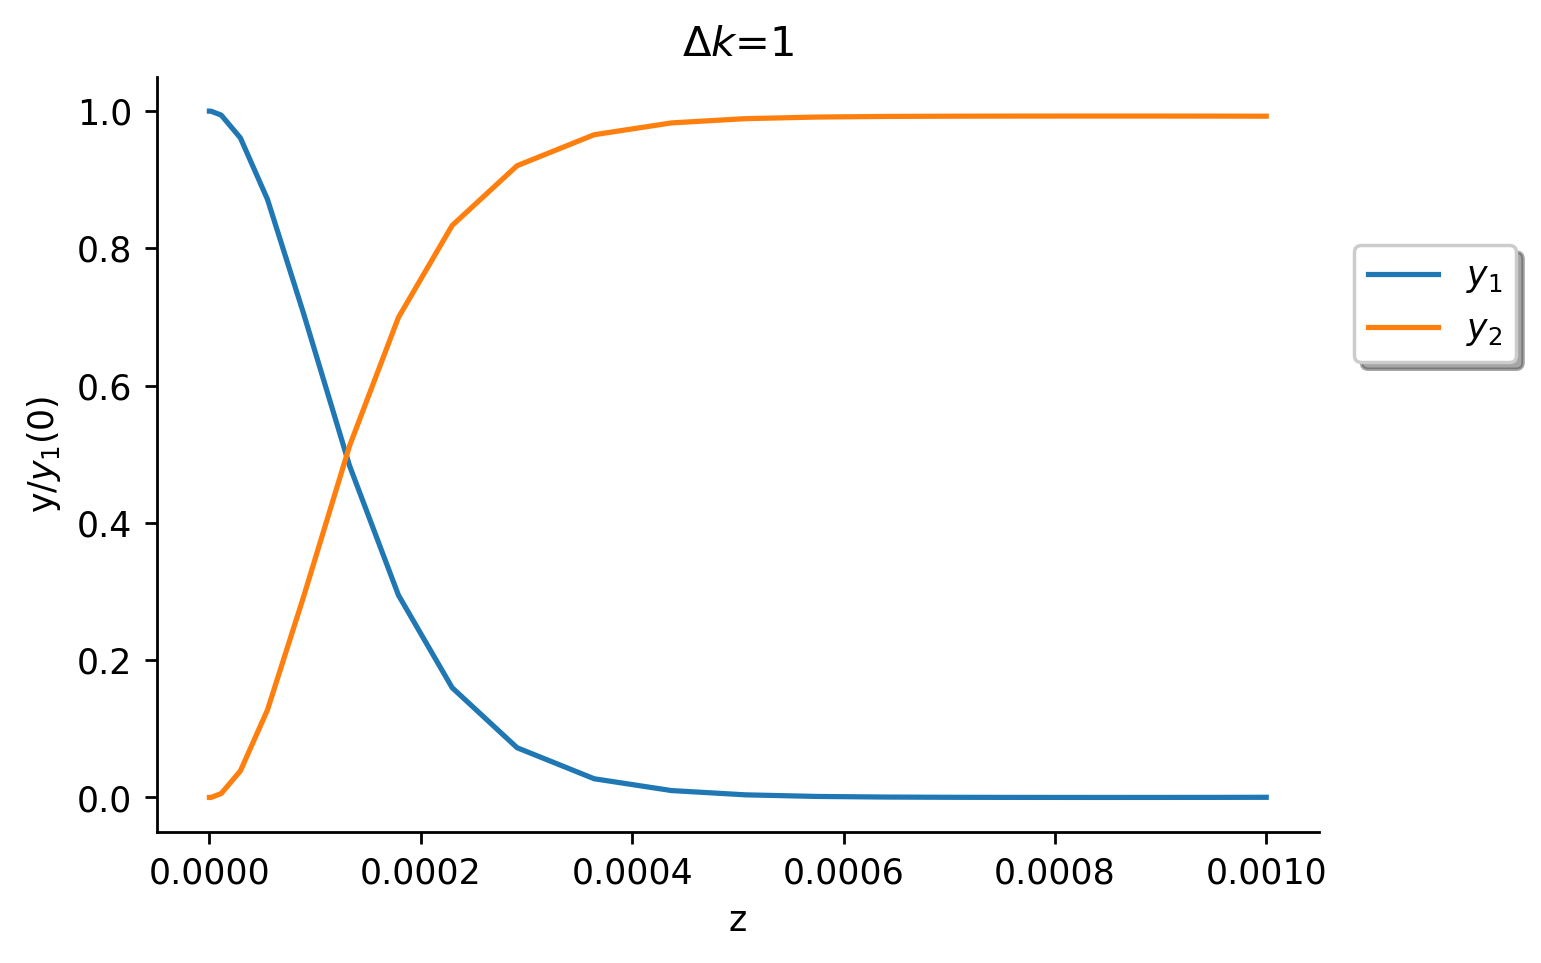

In [94]:
def coupled_diff_eqn(z,y,n1,n2,delta_k):
    
    y1=y[0]
    y2=y[1]
    
    
    dy1_dz=1j/n1*np.conj(y1)*y2*np.exp(1j*delta_k*z)
    dy2_dz=1j/n2*y1**2*np.exp(-1j*delta_k*z)
    
    return np.array([dy1_dz,dy2_dz])

def y2_for_cst_y1(z,y,n1,n2,delta_k):
    if delta_k==0.0:
        return 1j/n2*y[0]**2*z
    else:
        return 1j/n2*y[0]**2*np.exp(-1j*delta_k*z/2)*np.sin(delta_k*z/2)/(delta_k/2)

n1=1.46
n2=1.47


y1_0 = 10000*(1+0j) 
y2_0 = 0*(1+0j) 

z_start=0
z_end=0.001

z_range=np.linspace(z_start,z_end,100)
delta_k = 1

sol = solve_ivp(coupled_diff_eqn, 
                t_span=[z_start, z_end],
                y0=[y1_0,y2_0],
                args=(n1,n2,delta_k), 
                method='RK23')    

fig,ax=plt.subplots(dpi=250)
ax.plot(sol.t,np.abs(sol.y[0])**2/np.abs(y1_0)**2,label='$y_1$')
ax.plot(sol.t,np.abs(sol.y[1])**2/np.abs(y1_0)**2,label='$y_2$')
#ax.plot(z_range,np.abs( y2_for_cst_y1(z_range,[y1_0,y2_0],n1,n2,delta_k)  )**2/np.abs(y1_0)**2,label='Analytical $y_2$ for strong $y_1$')

ax.set_ylim(-0.05,1.05)
ax.set_title(f"$\Delta k$={delta_k}")
ax.set_ylabel('y/$y_1$(0)')
ax.set_xlabel('z')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(1.1, 0.8),
    ncol=1,
    fancybox=True,
    shadow=True,
)
#plt.yscale('log')
plt.savefig(f'Solution_delta_k={delta_k}.png')
plt.show()


    

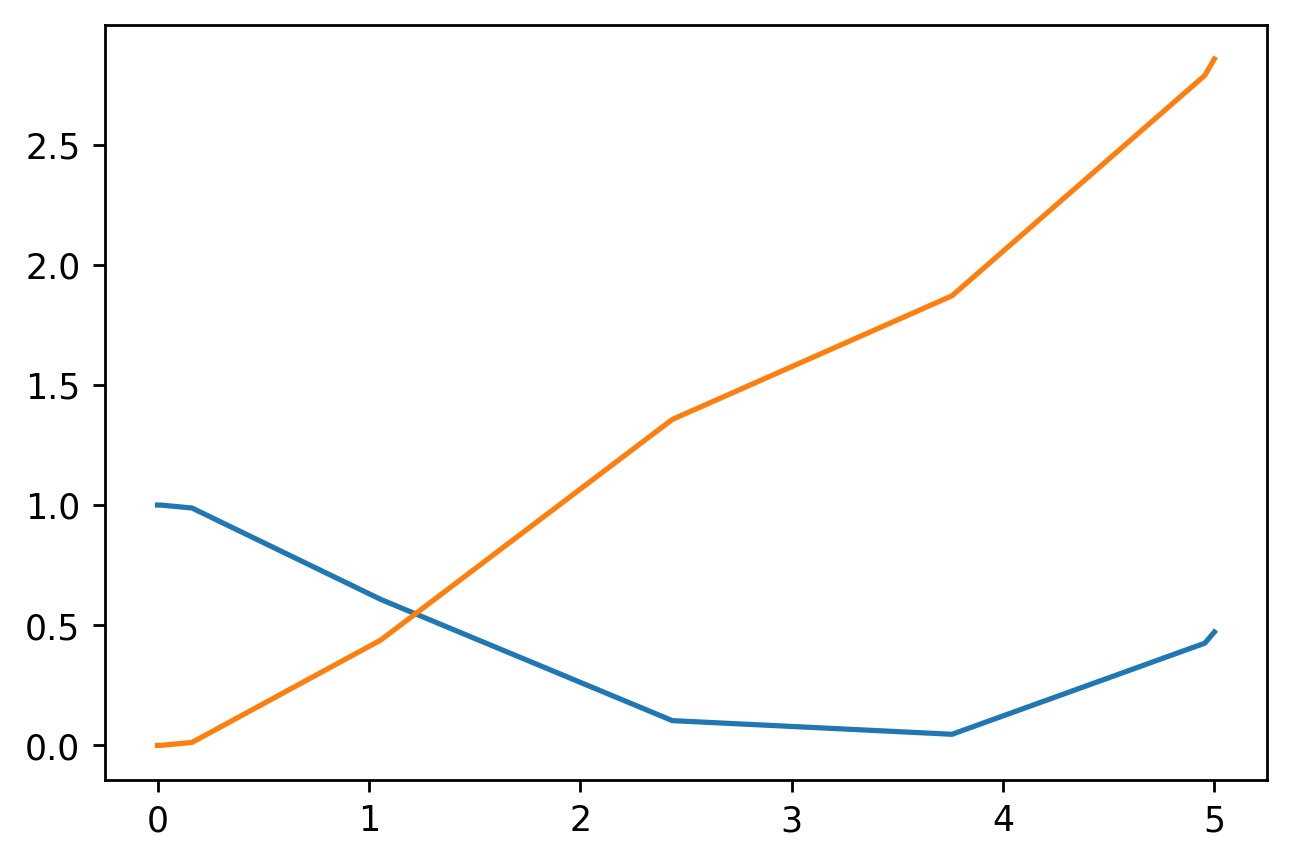